## Explorative Data Analysis

In [2]:
import pandas as pd 
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [3]:
# import the CSV file data\Coded_FS_Data.csv
df = pd.read_csv(r'C:\Users\hempe\Studium\Real_Project\Project_repo\data\raw\all_features_train_data.csv')
df.head() #Display the first 5 rows of the DataFrame

,isoelectric_point,protein_format,molecular_weight_da,product_conc_mg_ml,ph,mannitol_conc,citrate_conc,fructose_conc,ps50_conc,kcl_conc,succinate_conc,ps80_conc,llysine_conc,tm_c
0,5.9124,KNOB_HOLE,272510.88,172.80,5.0,270.0,15.0,0.0,0.4,0.0,0.0,0.0,0.0,151.160796
1,6.3024,IGG3,384763.02,518.40,7.0,0.0,15.0,0.0,0.4,0.0,0.0,0.0,135.0,163.060811
2,5.7642,NANO_MB,241517.52,414.72,6.5,0.0,15.0,135.0,0.0,0.0,0.0,0.4,67.5,160.065707
3,5.5458,DOPPELMAB,524743.11,518.40,7.0,0.0,15.0,135.0,0.4,0.0,0.0,0.0,67.5,149.202000
4,5.5458,DOPPELMAB,524743.11,518.40,5.5,0.0,0.0,0.0,0.4,135.0,15.0,0.0,0.0,146.868800


In [4]:
print(f"We have {len(df.index):,} observations and {len(df.columns)} columns in our dataset.")

We have 968 observations and 14 columns in our dataset.


In [5]:

# Display basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isoelectric_point    920 non-null    float64
 1   protein_format       968 non-null    object 
 2   molecular_weight_da  968 non-null    float64
 3   product_conc_mg_ml   968 non-null    float64
 4   ph                   968 non-null    float64
 5   mannitol_conc        968 non-null    float64
 6   citrate_conc         968 non-null    float64
 7   fructose_conc        968 non-null    float64
 8   ps50_conc            968 non-null    float64
 9   kcl_conc             968 non-null    float64
 10  succinate_conc       968 non-null    float64
 11  ps80_conc            968 non-null    float64
 12  llysine_conc         968 non-null    float64
 13  tm_c                 968 non-null    float64
dtypes: float64(13), object(1)
memory usage: 106.0+ KB


In [6]:
# Display descriptiv statistics of the DataFrame
df.describe() # Display basic statistics of the DataFrame       

,isoelectric_point,molecular_weight_da,product_conc_mg_ml,ph,mannitol_conc,citrate_conc,fructose_conc,ps50_conc,kcl_conc,succinate_conc,ps80_conc,llysine_conc,tm_c
count,920.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,6.008476,398939.067800,258.146777,5.464876,68.615702,7.670455,67.639463,0.336364,24.127066,7.329545,0.063636,42.745351,156.152304
std,0.336969,79241.626377,167.656869,0.839070,96.288385,7.501939,96.490277,0.146380,46.165392,7.501939,0.146380,47.695583,11.879712
min,5.499000,241517.520000,34.560000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129.431200
25%,5.772000,386148.750000,172.800000,5.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,148.661780
50%,5.982600,389595.720000,172.800000,5.000000,0.000000,15.000000,0.000000,0.400000,0.000000,0.000000,0.000000,33.750000,156.147706
75%,6.232200,421360.710000,414.720000,6.000000,135.000000,15.000000,135.000000,0.400000,0.000000,15.000000,0.000000,67.500000,164.706642
max,6.653400,530229.960000,518.400000,7.000000,270.000000,15.000000,270.000000,0.400000,135.000000,15.000000,0.400000,135.000000,185.894640


In [ ]:
# Append all categorical and numeric columns to different lists
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
numeric_cols = df.select_dtypes(include=['float64']).columns.tolist()
target_col = "tm_c"
numeric_features = df.select_dtypes(include='number').columns.drop(target_col).tolist()


print("The numerical columns are: ", numeric_cols)  
print("The categorical columns are: ", categorical_cols)
print("The target column is: ", target_col)
print("The numeric features are: ", numeric_features)

The numerical columns are:  ['isoelectric_point', 'molecular_weight_da', 'product_conc_mg_ml', 'ph', 'mannitol_conc', 'citrate_conc', 'fructose_conc', 'ps50_conc', 'kcl_conc', 'succinate_conc', 'ps80_conc', 'llysine_conc', 'tm_c']
The categorical columns are:  ['protein_format']
The target column is:  tm_c
The numeiic features are:  ['isoelectric_point', 'molecular_weight_da', 'product_conc_mg_ml', 'ph', 'mannitol_conc', 'citrate_conc', 'fructose_conc', 'ps50_conc', 'kcl_conc', 'succinate_conc', 'ps80_conc', 'llysine_conc']


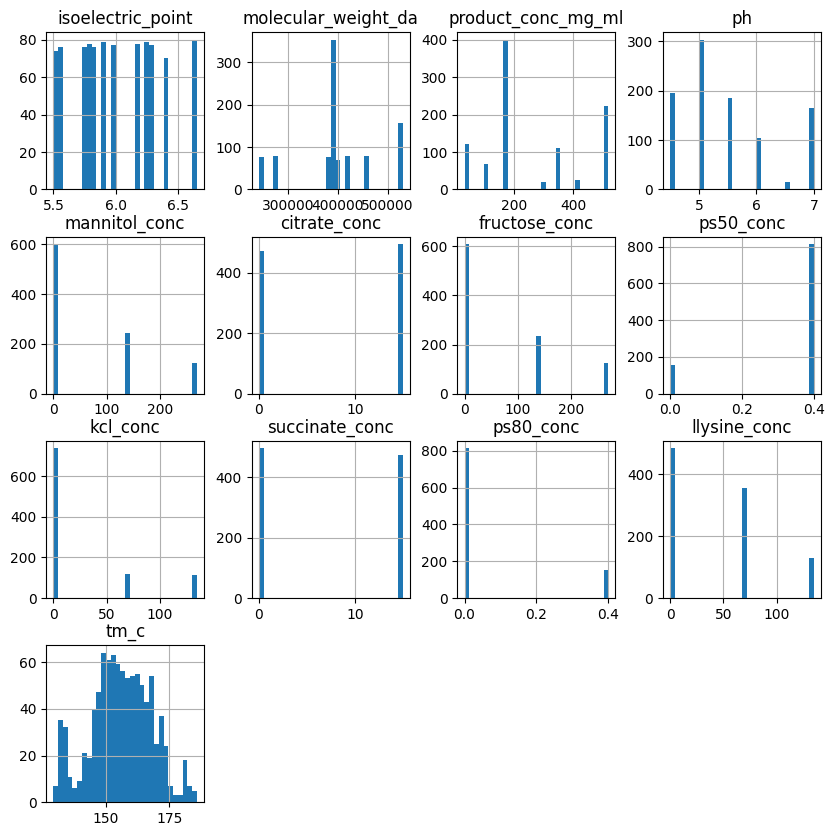

In [8]:
# Show the discribution of the numerical features in the DataFrame
hist = df.hist(bins=30,figsize=(10, 10))

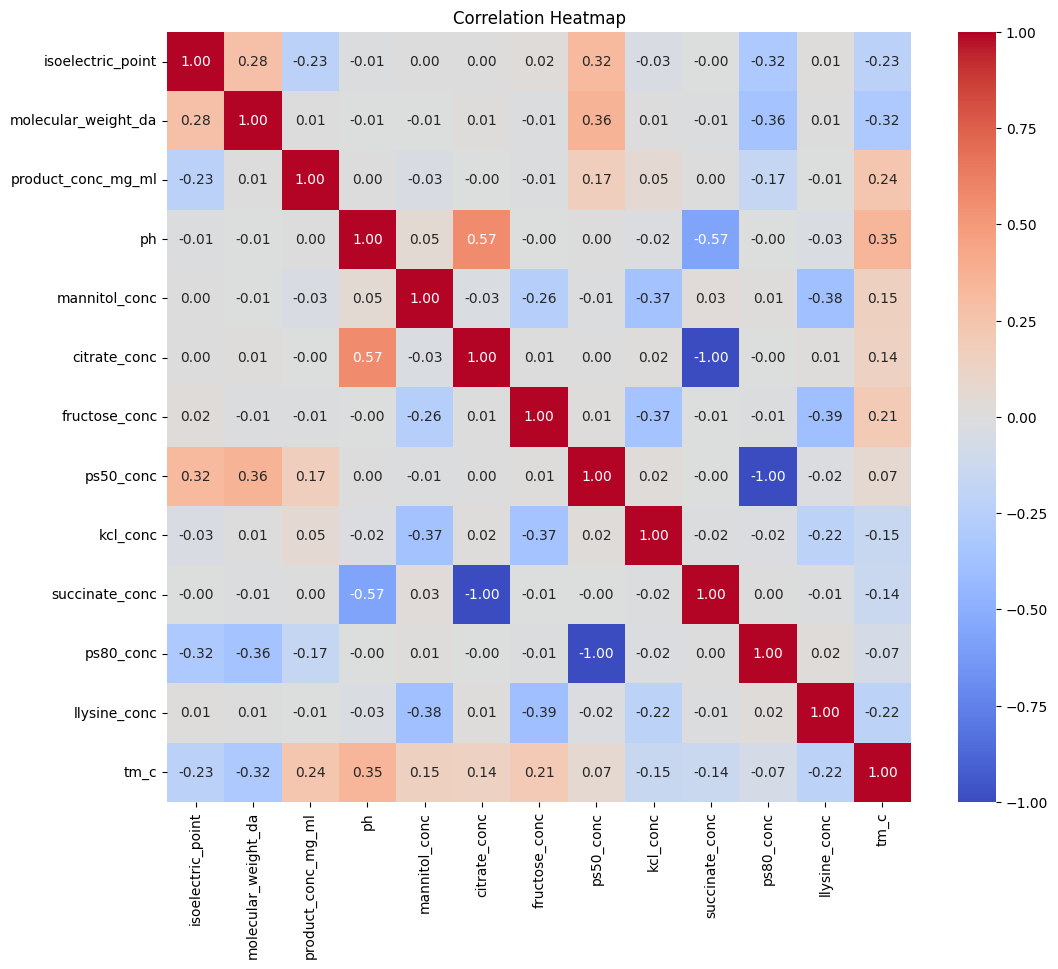

In [9]:
# Show me the correlation between the variables in a Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

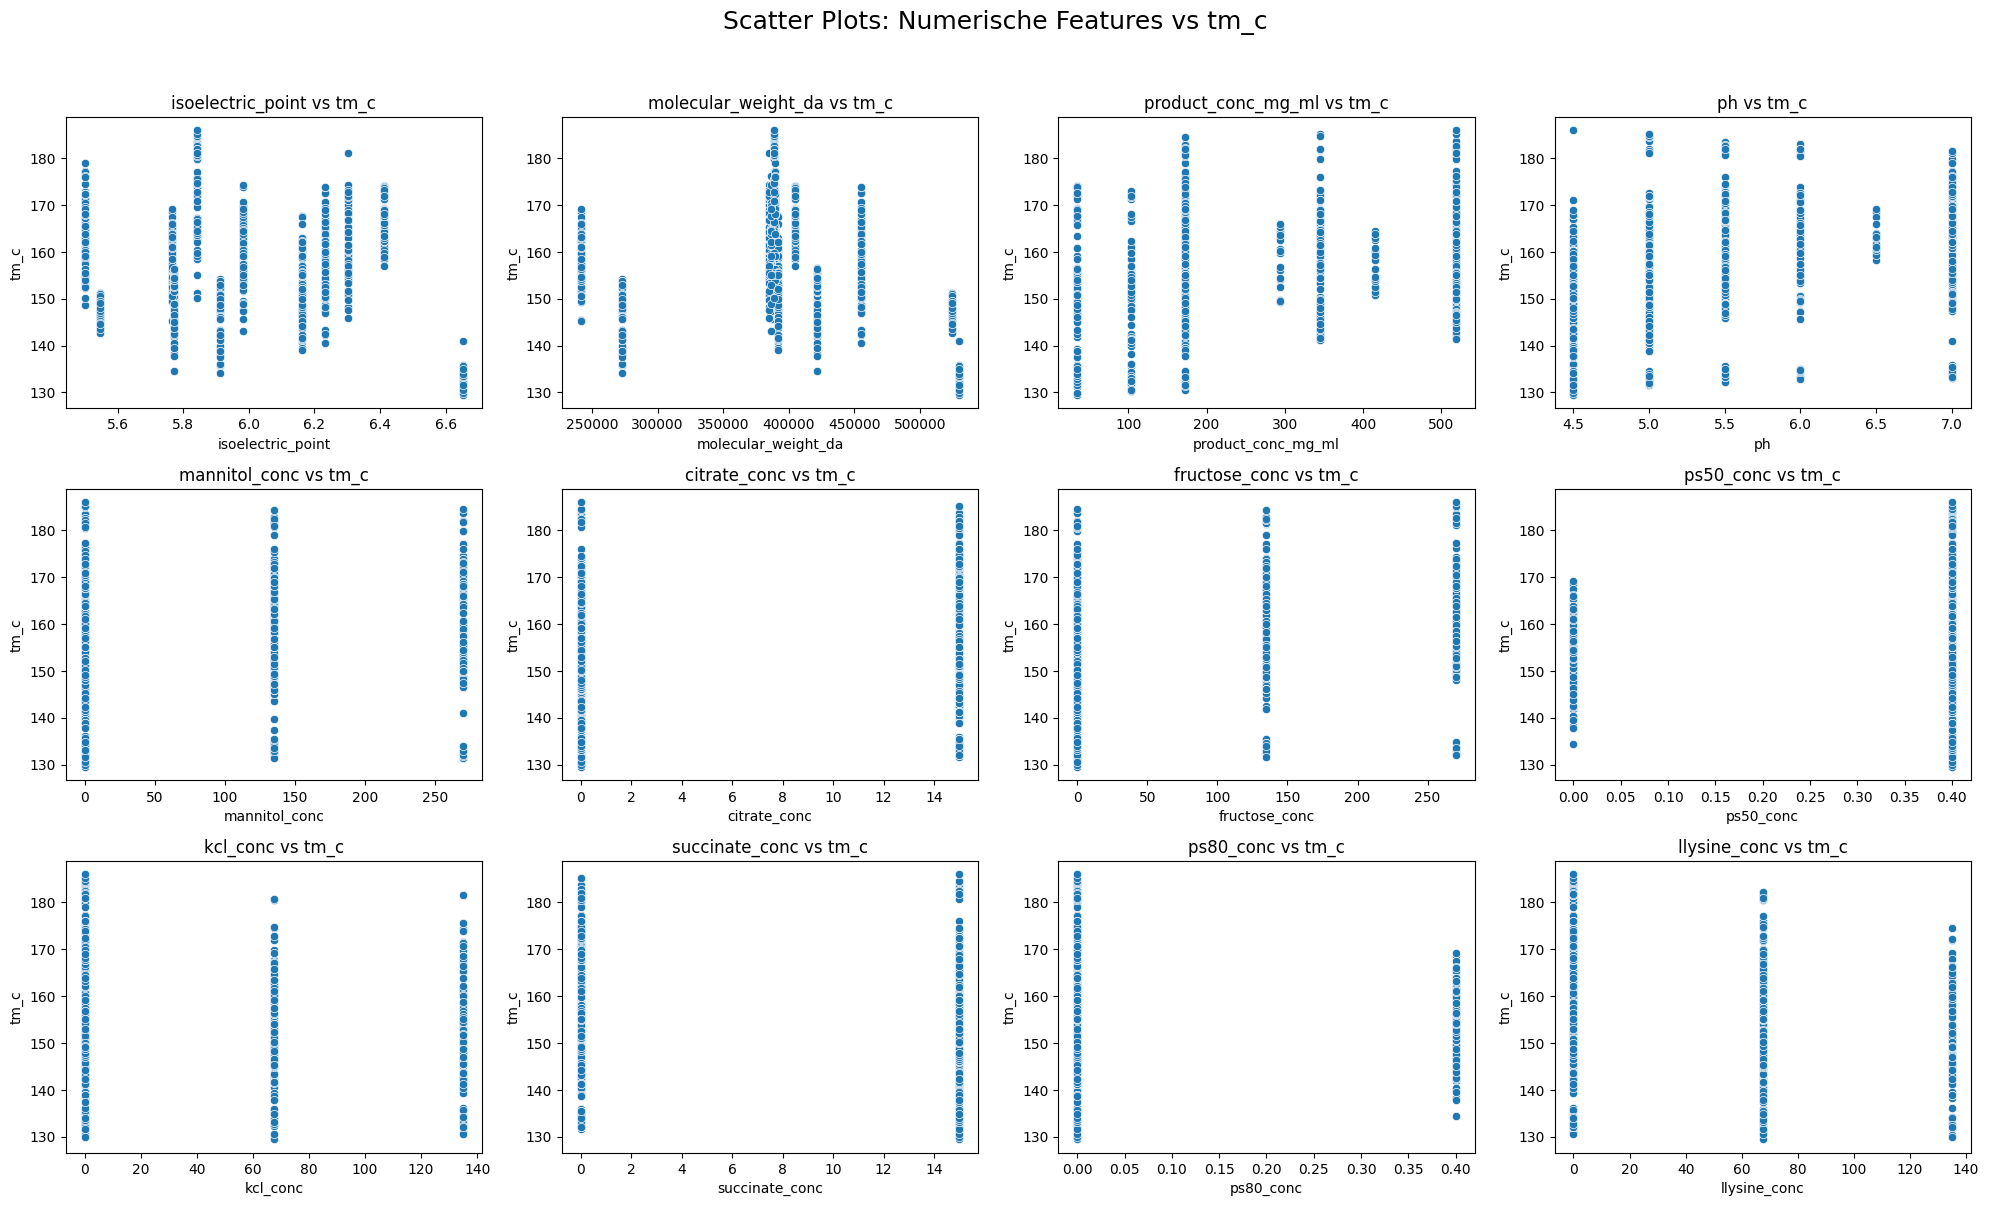

In [10]:
# Display of a scatter plot for each numerical feature and the relationship with the target variable in five rows

# Gridsize for the scatter plots
n_rows, n_cols = 4, 4
n_plots = len(numeric_features)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

# Scatterplots are filled
for i, col in enumerate(numeric_features):
    sns.scatterplot(data=df, x=col, y=target_col, ax=axes[i])
    axes[i].set_title(f'{col} vs {target_col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)

# Empty subplots are removed if there are fewer plots than grid size
for j in range(n_plots, n_rows * n_cols):
    fig.delaxes(axes[j])

# title and layout adjustments
plt.suptitle(f'Scatter Plots: Numerische Features vs {target_col}', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [11]:
# Display unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'protein_format':
['KNOB_HOLE' 'IGG3' 'NANO_MB' 'DOPPELMAB' 'IGG4']


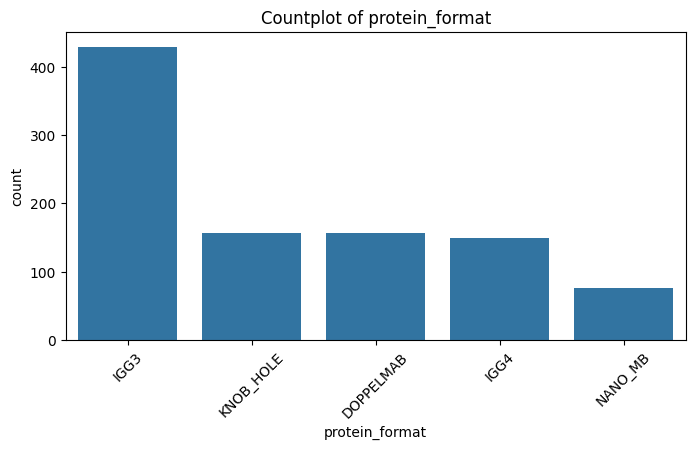

In [12]:
# Countplot for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

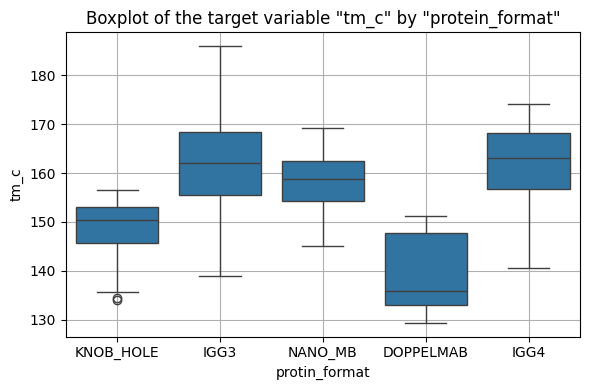

In [13]:
# Distribution of the target variable 'tm_c'within each category of 'protein_format'
plt.figure(figsize=(6, 4))
sns.boxplot(x='protein_format', y='tm_c', data=df)
plt.title('Boxplot of the target variable "tm_c" by "protein_format"')
plt.xlabel('protin_format')
plt.ylabel('tm_c')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

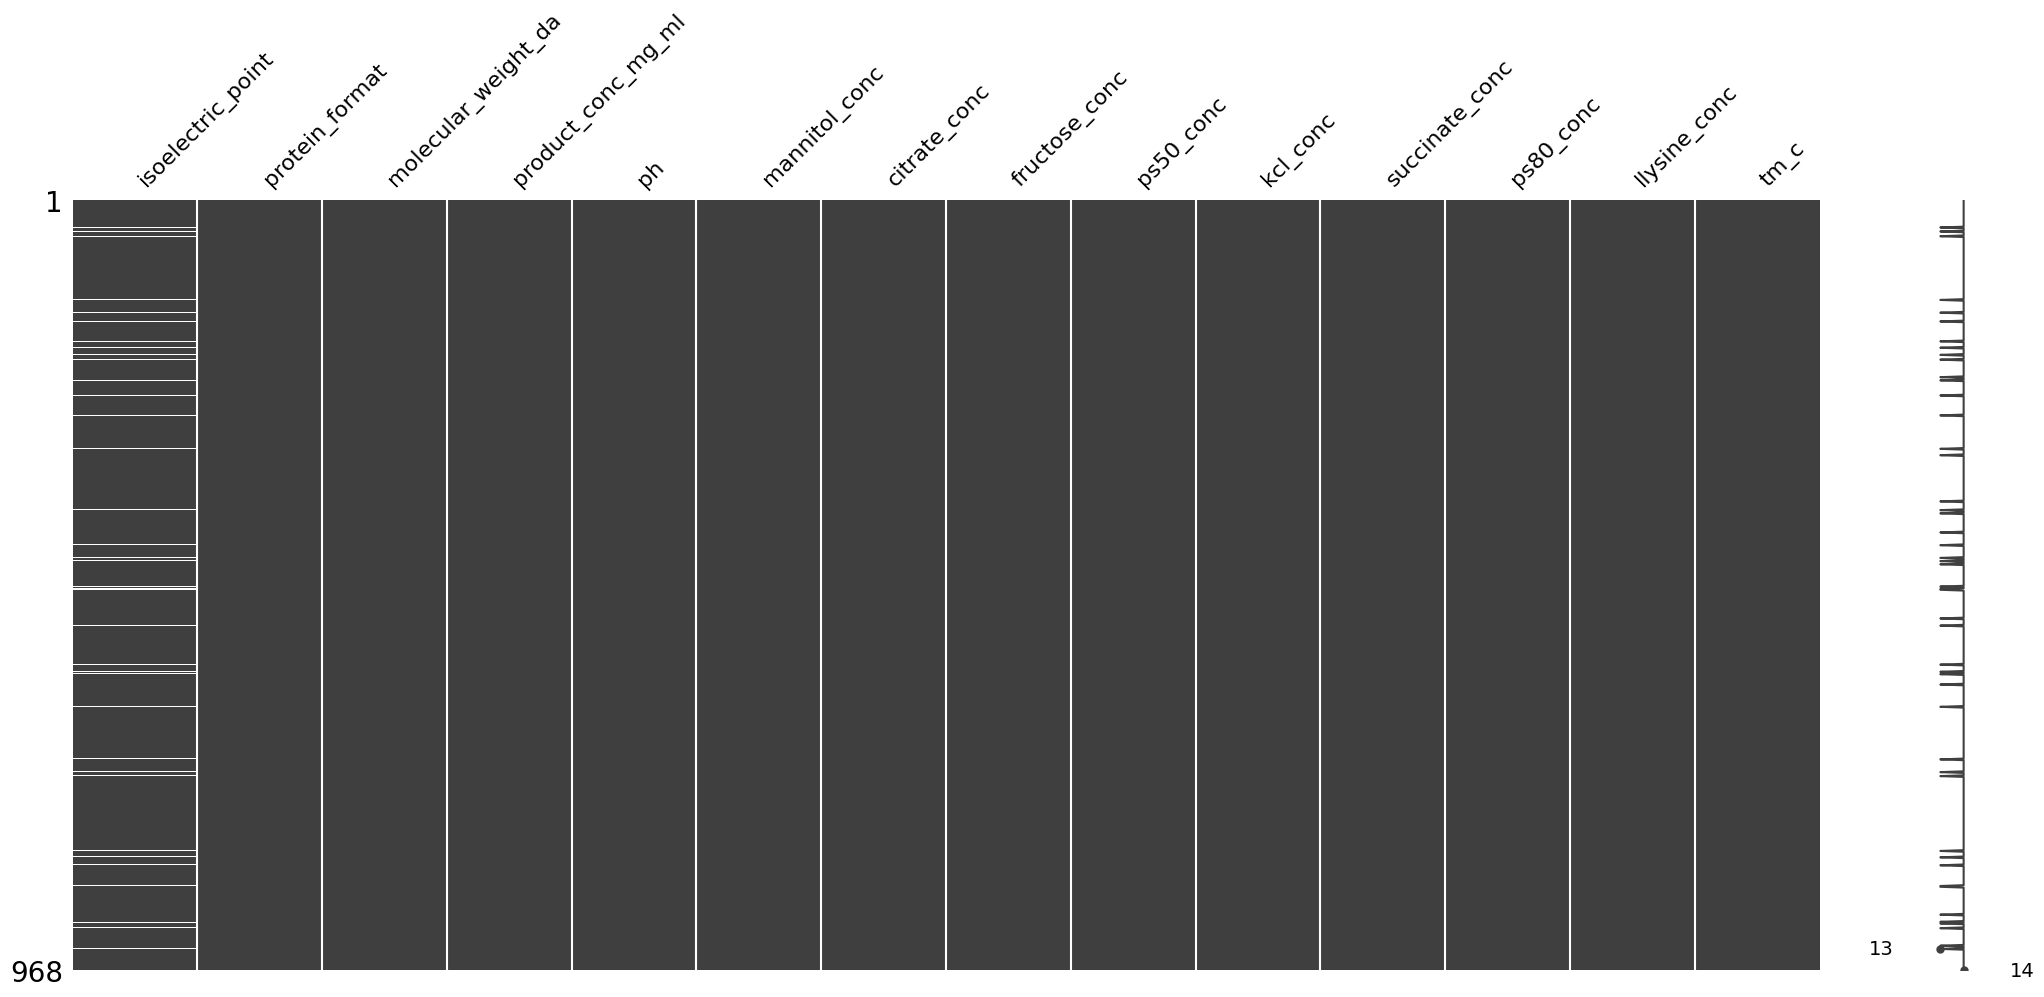

In [14]:
# show me the missing values in the dataframe in a matrix
msno.matrix(df)

<Axes: xlabel='tm_c'>

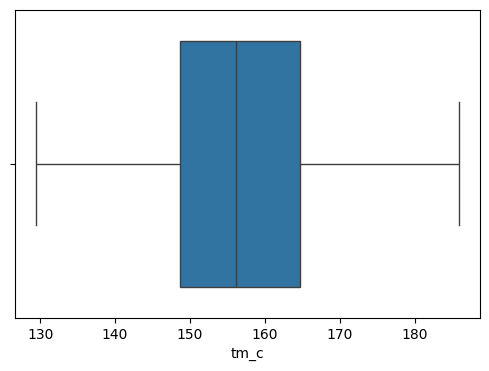

In [15]:
# Investigation of outliers of the target variable
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[target_col])   

In [16]:
# Define the column to analyze
col = target_col

# Calculate the IQR for the column
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Display the outliers
print(outliers.shape[0], "outliers found in the target variable 'tm_c':")

0 outliers found in the target variable 'tm_c':


Because not a single outlier was found. No outlier detection will be implemented in the preprocessing step of the Pipeline